In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

def load_dataset(file_path):
    df = pd.read_csv(file_path)
    return df

def calculate_pren(df):
    df['PREN'] = df['Cr'] + 3.3 * df['Mo'] + 16 * df['N']
    return df

def calculate_alloy_ratios(df):
    #df['Cr_Ni_ratio'] = df['Cr'] / df['Ni']
    df['Mo_Cr_ratio'] = df['Mo'] / df['Cr']
    #df['Mo_Ni_ratio'] = df['Mo'] / df['Ni']
    #df['Ti_Nb_ratio'] = df['Ti'] / df['Nb ']
    return df

def calculate_total_alloy_content(df):
    df['Total_Alloy_Content'] = df['Cr'] + df['Mo'] + df['Ni']
    return df

def calculate_acid_resistance_index(df):
    df['Acid_Resistance_Index'] = (
        df['Formic acid (HCOOH)'] +
        df['Acetic acid(CH3COOH)'] +
        df['Phosphric acid (H3PO4)'] +
        df['Sulfuric acid (H2SO4)'] +
        df['Nitric acid (HNO3)'] +
        df['Hydrocloric acid (HCl)']
    )
    return df

def calculate_temp_interaction_terms(df):
    df['Temp_Cr_Interact'] = df['Temperature'] * df['Cr']
    df['Temp_Mo_Interact'] = df['Temperature'] * df['Mo']
    df['Temp_Mo_Interact'] = df['Temperature'] * df['Ni']
    return df

def calculate_elemental_impurities(df):
    df['Steel_Impurities'] = (1 - (df['C'] + df['Mn'] + df['Si'] + df['P'] + df['S'] + df['Cr'] + df['Mo'] + df['Ni'] + df['N'] + df['Ti'] + df['Nb '] + df['Al']))
    return df


# Example usage:
file_path = r"C:\Users\dunzu\OneDrive\Desktop\Project\Dataset.csv"
df= load_dataset(file_path)
print(calculate_pren(df))
print(calculate_alloy_ratios(df))
print(calculate_total_alloy_content(df))
print(calculate_acid_resistance_index(df))
print(calculate_temp_interaction_terms(df))
print(calculate_elemental_impurities(df))

     ASTM Material     C    Mn    Si      P     S    Cr   Mo     Ni     N  \
0              403  0.15  1.00  0.50  0.040  0.03  11.5  0.0   0.60  0.00   
1              405  0.08  1.00  1.00  0.040  0.03  11.5  0.0   0.60  0.00   
2           S41050  0.04  1.00  1.00  0.045  0.03  10.5  0.0   0.60  0.10   
3              416  0.15  1.25  1.00  0.060  0.35  12.0  0.0   0.00  0.00   
4              410  0.15  1.00  1.00  0.040  0.03  11.5  0.0   0.75  0.00   
...            ...   ...   ...   ...    ...   ...   ...  ...    ...   ...   
4014         317LN  0.03  2.00  0.75  0.045  0.03  18.0  3.0  11.00  0.10   
4015           329  0.08  1.00  0.75  0.040  0.03  23.0  1.0   2.00  0.00   
4016        S31803  0.03  2.00  1.00  0.030  0.02  21.0  2.5   4.50  0.08   
4017         316Ti  0.08  2.00  0.75  0.045  0.03  16.0  2.0  10.00  0.10   
4018         316Cb  0.08  2.00  0.75  0.045  0.03  16.0  2.0  10.00  0.10   

      ...  Nitric acid (HNO3)  Hydrocloric acid (HCl)  \
0     ...         

In [2]:
df.shape, df.columns, df.dtypes

((4019, 38),
 Index(['ASTM Material', 'C', 'Mn', 'Si', 'P', 'S', 'Cr', 'Mo', 'Ni', 'N', 'Ti',
        'Nb ', 'Al', 'Fe balance (%)', 'Formic acid (HCOOH)',
        'Ammonium chloride(NH4Cl)', 'Acetic acid(CH3COOH)',
        'Potasium Hydroxide (KOH)', 'Lactic acid ', 'oxalic acid (COOH)2.2H2O',
        'Phosphric acid (H3PO4)', 'Sulfuric acid (H2SO4)', 'Nitric acid (HNO3)',
        'Hydrocloric acid (HCl)', 'Citric acid(HOC(CH2COOH)2COOH.H2O', 'KHSO4',
        'KNO3', 'MgCl2.6H2O', 'Temperature', 'Behavior', 'Pitting_label',
        'PREN', 'Mo_Cr_ratio', 'Total_Alloy_Content', 'Acid_Resistance_Index',
        'Temp_Cr_Interact', 'Temp_Mo_Interact', 'Steel_Impurities'],
       dtype='object'),
 ASTM Material                         object
 C                                    float64
 Mn                                   float64
 Si                                   float64
 P                                    float64
 S                                    float64
 Cr                  

In [3]:
df.isnull().sum()
#df.dropna(subset=['Mo_Cr_ratio', 'Mo_Ni_ratio', 'Ti_Nb_ratio'], inplace = True)

ASTM Material                        0
C                                    0
Mn                                   0
Si                                   0
P                                    0
S                                    0
Cr                                   0
Mo                                   0
Ni                                   0
N                                    0
Ti                                   0
Nb                                   0
Al                                   0
Fe balance (%)                       0
Formic acid (HCOOH)                  0
Ammonium chloride(NH4Cl)             0
Acetic acid(CH3COOH)                 0
Potasium Hydroxide (KOH)             0
Lactic acid                          0
oxalic acid (COOH)2.2H2O             0
Phosphric acid (H3PO4)               0
Sulfuric acid (H2SO4)                0
Nitric acid (HNO3)                   0
Hydrocloric acid (HCl)               0
Citric acid(HOC(CH2COOH)2COOH.H2O    0
KHSO4                    

In [4]:
df.describe()

,C,Mn,Si,P,S,Cr,Mo,Ni,N,Ti,...,MgCl2.6H2O,Temperature,Pitting_label,PREN,Mo_Cr_ratio,Total_Alloy_Content,Acid_Resistance_Index,Temp_Cr_Interact,Temp_Mo_Interact,Steel_Impurities
count,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,...,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000
mean,0.115924,1.530132,0.861085,0.047606,0.056569,15.830430,0.662914,5.206544,0.046387,0.067584,...,0.338393,71.172083,0.042299,18.760240,0.039092,21.699888,34.024882,1125.871349,369.843374,-23.516651
std,0.189390,0.487928,0.143499,0.026977,0.089388,2.783667,0.990280,4.143184,0.048159,0.220281,...,2.889184,51.278671,0.201296,5.399303,0.056970,6.528864,36.477031,846.078522,449.740819,6.915335
min,0.030000,1.000000,0.500000,0.030000,0.020000,10.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,0.000000,11.500000,0.000000,11.100000,0.000000,210.000000,0.000000,-33.955000
25%,0.030000,1.000000,0.750000,0.040000,0.030000,15.000000,0.000000,0.750000,0.000000,0.000000,...,0.000000,20.000000,0.000000,15.000000,0.000000,16.000000,0.500000,340.000000,50.000000,-29.445000
50%,0.080000,2.000000,0.750000,0.045000,0.030000,16.000000,0.000000,6.000000,0.030000,0.000000,...,0.000000,70.000000,0.000000,17.980000,0.000000,25.000000,10.000000,1120.000000,175.000000,-26.900000
75%,0.120000,2.000000,1.000000,0.045000,0.030000,17.500000,1.000000,9.000000,0.100000,0.000000,...,0.000000,101.000000,0.000000,24.200000,0.046875,27.500000,66.000000,1680.000000,688.000000,-17.520000
max,1.200000,2.000000,1.000000,0.200000,0.350000,23.000000,3.000000,11.000000,0.100000,0.900000,...,30.000000,335.000000,1.000000,30.530000,0.166667,32.000000,100.000000,7705.000000,3685.000000,-12.315000


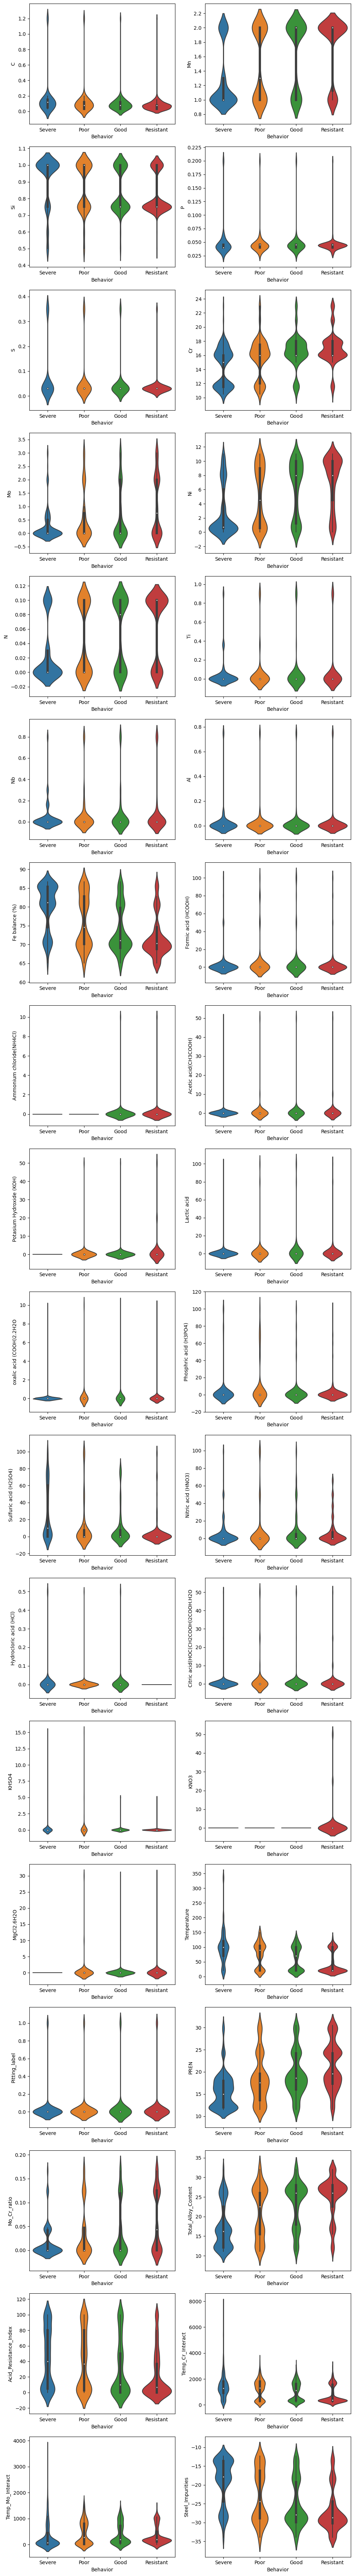

In [5]:
%matplotlib inline 
    #Exclude "Behavior" from the loop
columns_to_plot = [col for col in df.columns if not col in ["Behavior", "ASTM Material"]]
behavior_order = ["Severe", "Poor", "Good", "Resistant"]

 # Set up the grid
rows = (math.ceil(len(columns_to_plot)/2))
grid_size = (rows, 2)
fig, axes = plt.subplots(*grid_size, figsize=(10, 4*rows))

    # Loop through the columns and create violin plots
for i, col in enumerate(columns_to_plot):
    # print(col)
    sns.violinplot(data=df, x="Behavior", y=col, order = behavior_order, ax=axes[i//2][i%2])

    # Adjust layout
plt.tight_layout()

    # Show the plot
plt.show()


Accuracy: 0.9427860696517413


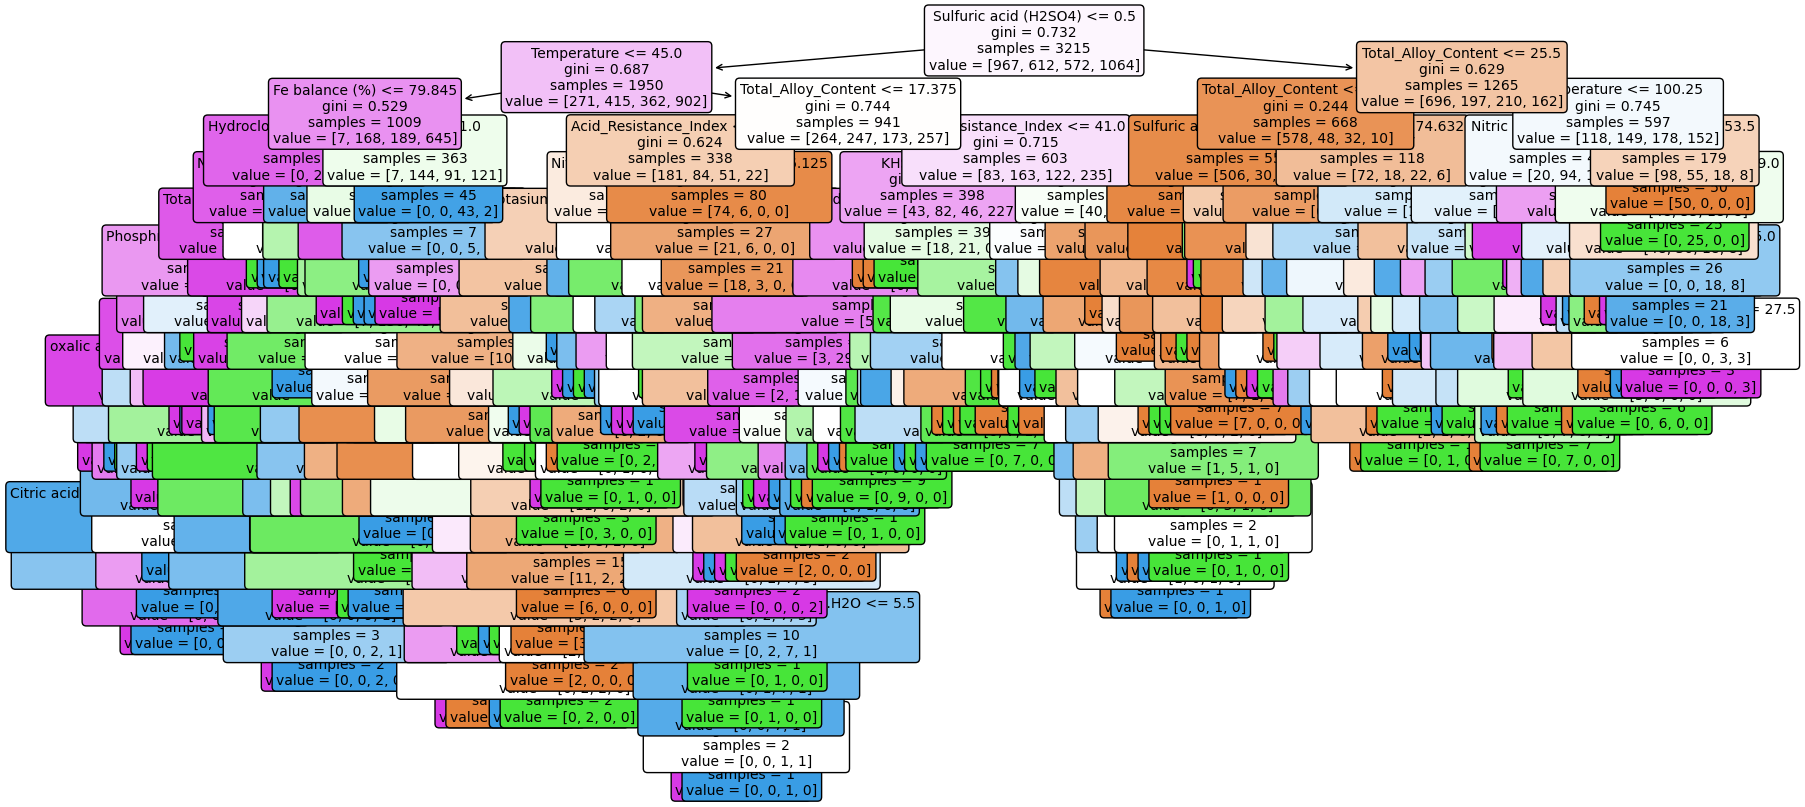

In [6]:
import sys
import matplotlib
#matplotlib.use('Agg')

import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

 # Replace string values with numerical values
df['Behavior'] = df['Behavior'].replace({'Severe': 0, 'Poor': 1, 'Good': 2, 'Resistant': 3})

#columns_to_plot = [col for col in df.columns if not col in ["Behavior", "ASTM Material"]]
features = ['C', 'Mn', 'Si', 'P', 'S', 'Cr', 'Mo', 'Ni', 'N', 'Ti',
        'Nb ', 'Al', 'Fe balance (%)', 'Formic acid (HCOOH)',
        'Ammonium chloride(NH4Cl)', 'Acetic acid(CH3COOH)',
        'Potasium Hydroxide (KOH)', 'Lactic acid ', 'oxalic acid (COOH)2.2H2O',
        'Phosphric acid (H3PO4)', 'Sulfuric acid (H2SO4)', 'Nitric acid (HNO3)',
        'Hydrocloric acid (HCl)', 'Citric acid(HOC(CH2COOH)2COOH.H2O', 'KHSO4',
        'KNO3', 'MgCl2.6H2O', 'Temperature', 'Pitting_label',
        'PREN', 'Mo_Cr_ratio', 'Total_Alloy_Content', 'Acid_Resistance_Index',
        'Temp_Cr_Interact', 'Temp_Mo_Interact', 'Steel_Impurities']

X = df[features]
y = df['Behavior']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
dtree = DecisionTreeClassifier()

# Train the classifier on the training set
dtree.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dtree.predict(X_test)

# Calculate and print accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Plot the decision tree
#plt.figure(figsize=(100,80))  # Specify the figure size
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=features, filled=True, rounded=True, fontsize=10)
plt.show()

Accuracy: 0.9390547263681592


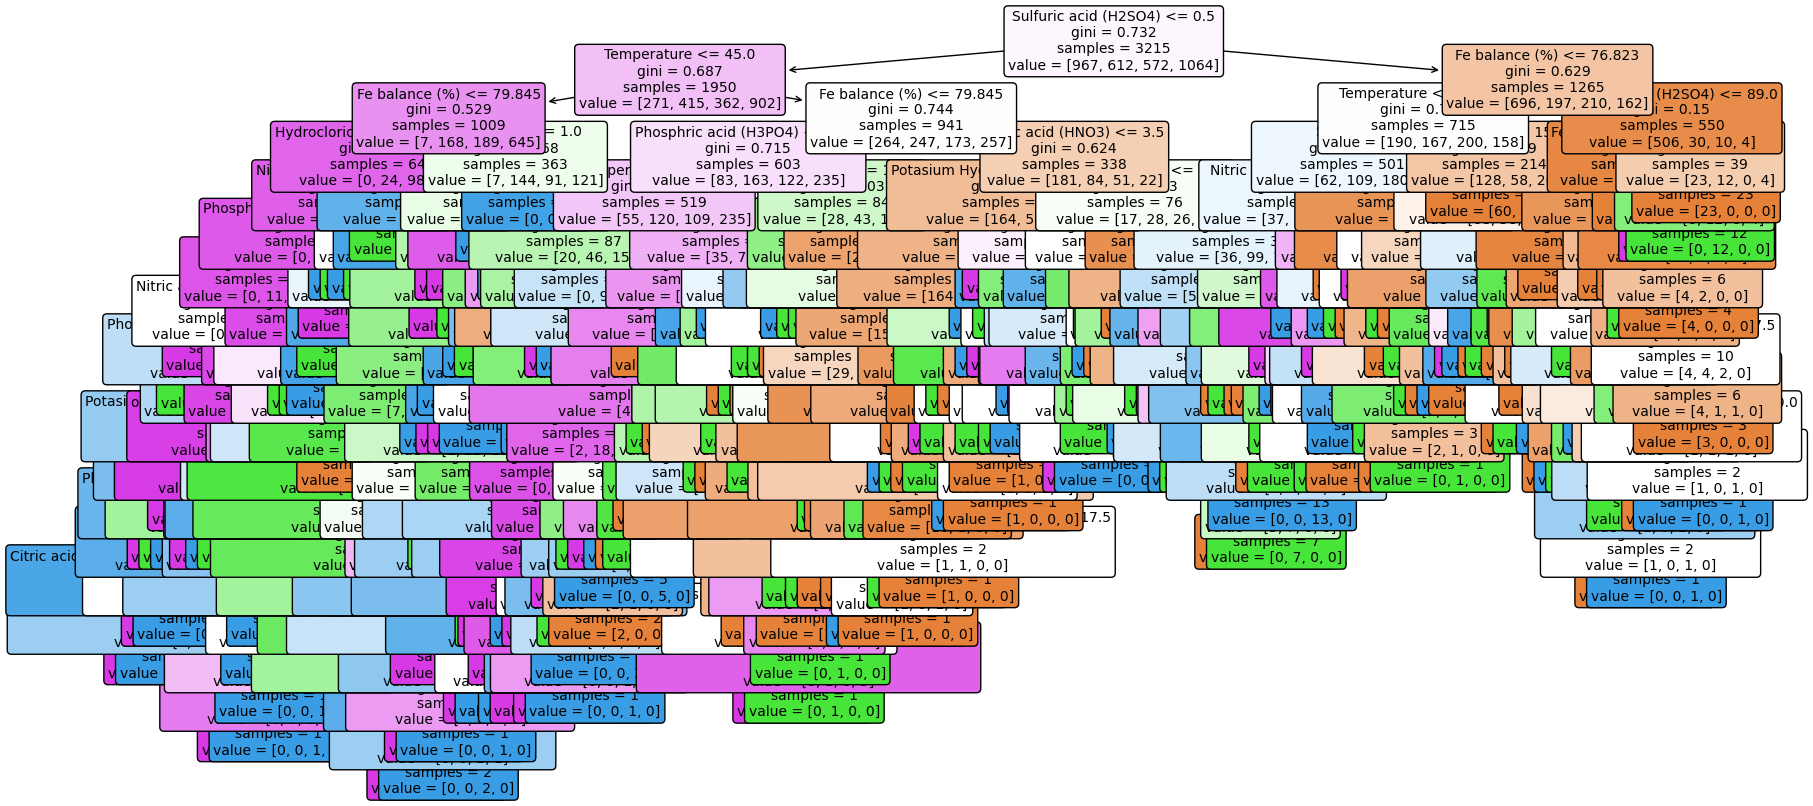

In [7]:
 # Replace string values with numerical values
df['Behavior'] = df['Behavior'].replace({'Severe': 0, 'Poor': 1, 'Good': 2, 'Resistant': 3})

#columns_to_plot = [col for col in df.columns if not col in ["Behavior", "ASTM Material"]]
features = ['C', 'Mn', 'Si', 'P', 'S', 'Cr', 'Mo', 'Ni', 'N', 'Ti',
        'Nb ', 'Al', 'Fe balance (%)', 'Formic acid (HCOOH)',
        'Ammonium chloride(NH4Cl)', 'Acetic acid(CH3COOH)',
        'Potasium Hydroxide (KOH)', 'Lactic acid ', 'oxalic acid (COOH)2.2H2O',
        'Phosphric acid (H3PO4)', 'Sulfuric acid (H2SO4)', 'Nitric acid (HNO3)',
        'Hydrocloric acid (HCl)', 'Citric acid(HOC(CH2COOH)2COOH.H2O', 'KHSO4',
        'KNO3', 'MgCl2.6H2O', 'Temperature', 'Pitting_label']

X = df[features]
y = df['Behavior']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
dtree = DecisionTreeClassifier()

# Train the classifier on the training set
dtree.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dtree.predict(X_test)

# Calculate and print accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Plot the decision tree
#plt.figure(figsize=(100,80))  # Specify the figure size
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=features, filled=True, rounded=True, fontsize=10)
plt.show()

In [8]:
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import MinMaxScaler

def preprocess_data(df):
    # Drop the 'ASTM Materials' column
    df = df.drop('ASTM Material', axis=1)
    
    # Replace string values with numerical values
    df['Behavior'] = df['Behavior'].replace({'Severe': 0, 'Poor': 1, 'Good': 2, 'Resistant': 3})
    
    # Separate features and target variable
    X = df.drop('Behavior', axis=1)
    y = df[['Behavior']]
    
    # Min-max scale numerical features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

def train_classifier(X_train, y_train, model):
    # Train a classifier
    model = MultiOutputClassifier(model)
    model.fit(X_train, y_train)
    return model.predict(X_test)

# Assuming df is your DataFrame
X_scaled, y = preprocess_data(df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Train the classifier
model = LogisticRegression()

y_pred = train_classifier(X_train, y_train, model)

print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.7200    0.8120    0.7633       266
           1     0.4466    0.3262    0.3770       141
           2     0.3125    0.1333    0.1869       150
           3     0.6261    0.8543    0.7226       247

    accuracy                         0.6132       804
   macro avg     0.5263    0.5315    0.5125       804
weighted avg     0.5672    0.6132    0.5755       804



C:\Users\dunzu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
model = RandomForestClassifier(n_estimators=400)

y_pred = train_classifier(X_train, y_train, model)

print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.9254    0.9323    0.9288       266
           1     0.8271    0.7801    0.8029       141
           2     0.8633    0.8000    0.8304       150
           3     0.9129    0.9757    0.9432       247

    accuracy                         0.8943       804
   macro avg     0.8822    0.8720    0.8764       804
weighted avg     0.8927    0.8943    0.8928       804



In [13]:
model = GradientBoostingClassifier(n_estimators = 400)

y_pred = train_classifier(X_train, y_train, model)

print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.9774    0.9737    0.9755       266
           1     0.8582    0.8582    0.8582       141
           2     0.8944    0.8467    0.8699       150
           3     0.9570    0.9919    0.9742       247

    accuracy                         0.9353       804
   macro avg     0.9217    0.9176    0.9194       804
weighted avg     0.9347    0.9353    0.9348       804



In [18]:
model = BaggingClassifier(n_estimators = 400)

y_pred = train_classifier(X_train, y_train, model)

print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.9731    0.9511    0.9620       266
           1     0.8849    0.8723    0.8786       141
           2     0.9026    0.9267    0.9145       150
           3     0.9761    0.9919    0.9839       247

    accuracy                         0.9453       804
   macro avg     0.9342    0.9355    0.9347       804
weighted avg     0.9454    0.9453    0.9452       804

